In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
data = pd.read_csv("Alpha_dataset.csv")
print(data.to_string())

     Sleep Duration  Quality of Sleep  Weight_Category_BMI  Gender_Numerical  Physical Activity Level (scaled)  Heart Rate (scaled)  Daily Steps (scaled)  Age (scaled)  Stress_Binary
0               6.1                 6                    2                 1                          4.727273             7.909091              4.779478      3.363636              1
1               6.2                 6                    1                 1                          6.363636             7.727273             10.000000      3.454545              1
2               5.9                 4                    3                 1                          3.636364             8.636364              3.699370      3.454545              1
3               5.9                 4                    3                 1                          3.636364             8.636364              3.699370      3.454545              1
4               6.3                 6                    3                 1         

In [3]:
X = data.drop(columns=['Stress_Binary'])  # All columns except 'Stress_Binary' as features
y = data['Stress_Binary']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
#Modellen
model = LogisticRegression(max_iter=5000)

#Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength = Des lavere værdi des mindre kompleks bliver grafen, des større værdi, des mere kompleks. Dette kan give under eller overfitting. 
    'penalty': ['l1', 'l2'],             # Regularization type = l1 vil gerne fjerne irrelevante features, hvor den kan sætte værdierne til 0. Omvendt for l2, hvor man siger, at alle features er vigtige og at den ikke må fjerne nogen. 
                                        #l1 = Lasso Regularization / l2 = Ridge Regularization
    'solver': ['liblinear', 'saga'],     # Solver (compatible with L1 and L2) = liblinear = Er god til små dataset / saga = god til store dataset
    'class_weight': [None, 'balanced']   # Handle imbalanced data = None = modellen regner med at alle klasser er lige vigtige / balanced = Automatisk ændrer vægtningen af featues, den sørger for at vise, at alle features er lige vigtige. 
}



In [5]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',    # Use accuracy as the metric
    cv=5,                  # 5-fold cross-validation
    verbose=1
)

In [6]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [7]:
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9567251461988304


In [8]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [9]:
# Test set performance
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.95


In [10]:
# Additional metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Recall:", recall)
print("Precision:", precision)

Recall: 1.0
Precision: 0.9047619047619048


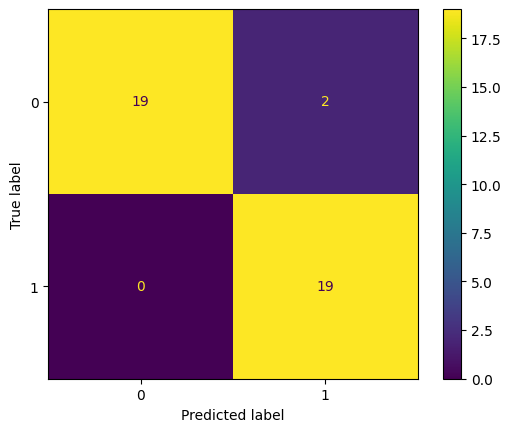

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()